In [54]:
from PopularityContest.Model.best_model import tuning
from PopularityContest.Model.best_model import fit_n_predict
from PopularityContest.Model.best_model import conf_mat
from PopularityContest.Model.best_model import plot_feats
from PopularityContest.Process.feature1 import *
from PopularityContest.Process.feature2 import *
from PopularityContest.Process.feature3 import *
from PopularityContest.Model.split import tt_split
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [55]:
data = pd.read_csv("~/Documents/GitHub/Computing-Final/PopularityContest/Load/songfeatures.csv").select_dtypes("number")
data.head(5)

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Top50
0,0,0.887,0.234,9,-14.520,1,0.1780,0.11100,0.670000,0.1300,0.197,140.020,196800,4,1
1,1,0.751,0.761,11,-4.113,0,0.1500,0.25100,0.000238,0.0991,0.553,92.032,151325,4,1
2,2,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,162638,4,1
3,3,0.901,0.589,1,-6.713,0,0.2890,0.00302,0.000237,0.0992,0.399,98.002,196600,4,1
4,4,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,198938,4,1


In [56]:
data = feature1(data)
data = genre(data)
data = time(data, "seconds")
data.head(5)

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Top50,happy,HipHop,Reggaeton,Pop,House/Electro/Techno,duration_s
0,0,0.887,0.234,9,-14.520,1,0.1780,0.11100,0.670000,0.1300,0.197,140.020,4,1,0,0,0,0,1,196.800
1,1,0.751,0.761,11,-4.113,0,0.1500,0.25100,0.000238,0.0991,0.553,92.032,4,1,1,1,1,0,0,151.325
2,2,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,1,1,0,0,1,1,162.638
3,3,0.901,0.589,1,-6.713,0,0.2890,0.00302,0.000237,0.0992,0.399,98.002,4,1,0,0,1,0,0,196.600
4,4,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,1,1,0,0,1,1,198.938


In [57]:
X_train, X_test, y_train, y_test = tt_split(data,"Top50")
X_test

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,happy,HipHop,Reggaeton,Pop,House/Electro/Techno,duration_s
307,257,0.901,0.589,1,-6.713,0,0.2890,0.00302,0.000237,0.0992,0.399,98.002,4,0,0,1,0,0,196.600
342,292,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,1,0,0,1,1,162.638
292,242,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,1,0,0,1,1,162.638
102,52,0.751,0.761,11,-4.113,0,0.1500,0.25100,0.000238,0.0991,0.553,92.032,4,1,1,1,0,0,151.325
294,244,0.751,0.761,11,-4.113,0,0.1500,0.25100,0.000238,0.0991,0.553,92.032,4,1,1,1,0,0,151.325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,17,0.739,0.682,9,-5.121,0,0.0972,0.41700,0.000039,0.1050,0.476,94.048,4,0,1,1,0,0,186.723
257,207,0.901,0.589,1,-6.713,0,0.2890,0.00302,0.000237,0.0992,0.399,98.002,4,0,0,1,0,0,196.600
224,174,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,1,0,0,1,1,162.638
88,38,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,1,0,0,1,1,162.638


In [58]:
parameters_forest = {
    "criterion" : ['gini', 'entropy'],
    "max_depth" : [4, 5, 6, 7, 8, 9, 10, 11, 12],
    "max_features" : ['auto', 'log2', 'sqrt'],
    "min_samples_split" : [2, 4, 6, 8, 10]
}

In [59]:
rf = tuning(RandomForestClassifier(random_state=1), parameters_forest, X_train, y_train)

rf

rf, predictions_rf = fit_n_predict(X_train, X_test, y_train, y_test, rf)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Estimator:  RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=8,
                       random_state=1)  

Accuracy Score: 0.99
Precision Score: 1.00
Recall Score: 0.93
F1 Score: 0.96


In [60]:
conf_mat(y_test, predictions_rf)

KeyError: "'seagreen' is not a known colormap name"

<Figure size 1000x700 with 0 Axes>

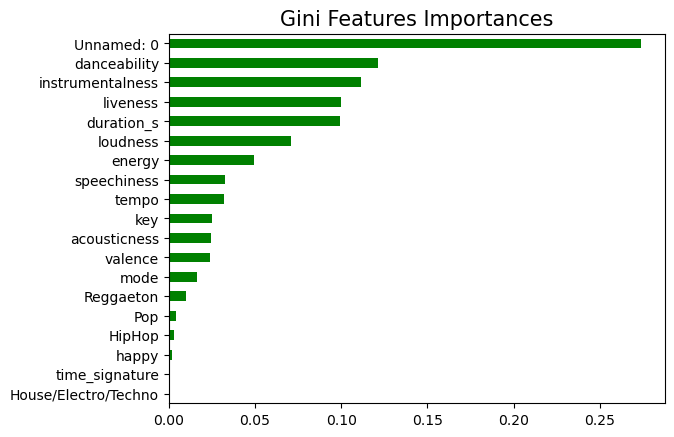

In [61]:
X=data.drop(columns=["Top50"], axis=1)
plot_feats(rf, X)